# Mean-Reversion
This is a backtest of the following strategy:
Buy Nifty Bees ETF if moving average of price drops below 0.15 percentile

Esentially what we are trying to do is buy the dips of the ETF ,decreasing average holding cost for the same.
This can be used as an investment strategy.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf
from datetime import date
sb.set()
pd.set_option('display.max_rows', None)


from matplotlib import rcParams
rcParams['figure.figsize'] = 16,12 #to set figure size

In [2]:
today = str(date.today())

In [3]:
year=int(today[:4])
year-=1
five_years_ago= str(year) + today[4:]
five_years_ago

'2020-09-16'

In [4]:
df = yf.download('NIFTYBEES.NS', 
                  start=five_years_ago, 
                  end=today, 
                  progress=False,
                )
df= df.drop('Open', axis=1)
df= df.drop('High', axis=1)
df= df.drop('Low', axis=1)
df= df.drop('Adj Close', axis=1)
df= df.drop('Volume', axis=1)
df

,Close
Date,
2020-09-16,123.709999
2020-09-17,122.720001
2020-09-18,122.660004
2020-09-21,119.919998
2020-09-22,118.910004
2020-09-23,118.949997
2020-09-24,115.760002
2020-09-25,117.870003
2020-09-28,119.750000


In [5]:

df['returns'] = df['Close'].diff()
df['dummy'] = df['Close'].shift(1)
df['returns']=(df['returns']/df['dummy'])
df=df.drop('dummy',axis=1)
df

,Close,returns
Date,,
2020-09-16,123.709999,NaN
2020-09-17,122.720001,-0.008003
2020-09-18,122.660004,-0.000489
2020-09-21,119.919998,-0.022338
2020-09-22,118.910004,-0.008422
2020-09-23,118.949997,0.000336
2020-09-24,115.760002,-0.026818
2020-09-25,117.870003,0.018227
2020-09-28,119.750000,0.015950


In [6]:
df['ma']= df['Close'].rolling(3).mean()
df

,Close,returns,ma
Date,,,
2020-09-16,123.709999,NaN,NaN
2020-09-17,122.720001,-0.008003,NaN
2020-09-18,122.660004,-0.000489,123.030001
2020-09-21,119.919998,-0.022338,121.766668
2020-09-22,118.910004,-0.008422,120.496668
2020-09-23,118.949997,0.000336,119.260000
2020-09-24,115.760002,-0.026818,117.873334
2020-09-25,117.870003,0.018227,117.526667
2020-09-28,119.750000,0.015950,117.793335


In [7]:
df['ratio']=df['Close']/df['ma']
df

,Close,returns,ma,ratio
Date,,,,
2020-09-16,123.709999,NaN,NaN,NaN
2020-09-17,122.720001,-0.008003,NaN,NaN
2020-09-18,122.660004,-0.000489,123.030001,0.996993
2020-09-21,119.919998,-0.022338,121.766668,0.984834
2020-09-22,118.910004,-0.008422,120.496668,0.986832
2020-09-23,118.949997,0.000336,119.260000,0.997401
2020-09-24,115.760002,-0.026818,117.873334,0.982071
2020-09-25,117.870003,0.018227,117.526667,1.002921
2020-09-28,119.750000,0.015950,117.793335,1.016611


# Getting required percentiles after testing multiple values and choosing best option

After testing multiple values, the 5th and 80th percentile seemed to capture 
most of the action

In [8]:
x=df.quantile(0.15)
p1=x['ratio'] #15th Percentile


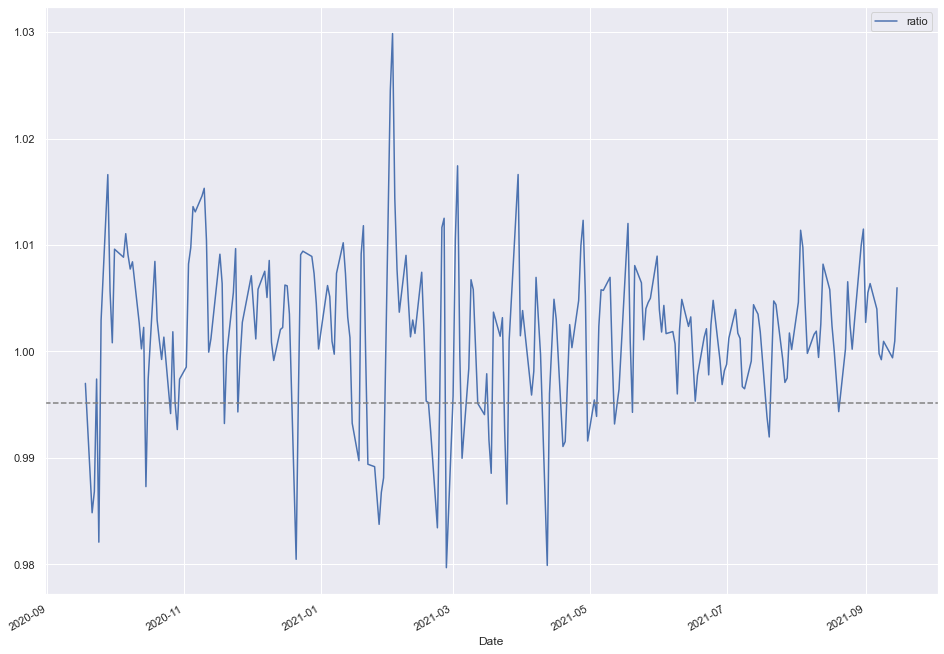

In [9]:
df['ratio'].dropna().plot(legend = True)
plt.axhline(p1, c= (.5,.5,.5), ls='--')

In [10]:
long = p1
df['position'] = np.where(df.ratio < long, 1, 0)
#df['position'] = df['position'].ffill()

In [11]:
df

,Close,returns,ma,ratio,position
Date,,,,,
2020-09-16,123.709999,NaN,NaN,NaN,0
2020-09-17,122.720001,-0.008003,NaN,NaN,0
2020-09-18,122.660004,-0.000489,123.030001,0.996993,0
2020-09-21,119.919998,-0.022338,121.766668,0.984834,1
2020-09-22,118.910004,-0.008422,120.496668,0.986832,1
2020-09-23,118.949997,0.000336,119.260000,0.997401,0
2020-09-24,115.760002,-0.026818,117.873334,0.982071,1
2020-09-25,117.870003,0.018227,117.526667,1.002921,0
2020-09-28,119.750000,0.015950,117.793335,1.016611,0


In [12]:
Position=df['position']
Close=df['Close']
stock_counter=0
total=0

strat_port_value=[]
loc=0
for i in range(0,len(Position),1):
    if(Position[i]==1):
        loc=i
        break
    else:
        strat_port_value.append(Close[i])
strat_port_value


[123.70999908447266, 122.72000122070312, 122.66000366210938]

In [13]:
for i in range(loc,len(Position),1):
    currentPrice=Close[i]
    if(Position[i]==1):
        total+=currentPrice
        stock_counter+=1
    strat_port_value.append(total/stock_counter)
        
strat_port_value[-1]

149.8700002721838

In [14]:
df['strat_price_value']=strat_port_value
df

,Close,returns,ma,ratio,position,strat_price_value
Date,,,,,,
2020-09-16,123.709999,NaN,NaN,NaN,0,123.709999
2020-09-17,122.720001,-0.008003,NaN,NaN,0,122.720001
2020-09-18,122.660004,-0.000489,123.030001,0.996993,0,122.660004
2020-09-21,119.919998,-0.022338,121.766668,0.984834,1,119.919998
2020-09-22,118.910004,-0.008422,120.496668,0.986832,1,119.415001
2020-09-23,118.949997,0.000336,119.260000,0.997401,0,119.415001
2020-09-24,115.760002,-0.026818,117.873334,0.982071,1,118.196668
2020-09-25,117.870003,0.018227,117.526667,1.002921,0,118.196668
2020-09-28,119.750000,0.015950,117.793335,1.016611,0,118.196668


In [15]:
df['Buy/Hold-returns']=0
df

,Close,returns,ma,ratio,position,strat_price_value,Buy/Hold-returns
Date,,,,,,,
2020-09-16,123.709999,NaN,NaN,NaN,0,123.709999,0
2020-09-17,122.720001,-0.008003,NaN,NaN,0,122.720001,0
2020-09-18,122.660004,-0.000489,123.030001,0.996993,0,122.660004,0
2020-09-21,119.919998,-0.022338,121.766668,0.984834,1,119.919998,0
2020-09-22,118.910004,-0.008422,120.496668,0.986832,1,119.415001,0
2020-09-23,118.949997,0.000336,119.260000,0.997401,0,119.415001,0
2020-09-24,115.760002,-0.026818,117.873334,0.982071,1,118.196668,0
2020-09-25,117.870003,0.018227,117.526667,1.002921,0,118.196668,0
2020-09-28,119.750000,0.015950,117.793335,1.016611,0,118.196668,0


In [16]:
df['vs_strat_returns']=(df['Close']-df['strat_price_value'])/df['Close']
df['vs_strat_returns']=df['vs_strat_returns']*100
df

,Close,returns,ma,ratio,position,strat_price_value,Buy/Hold-returns,vs_strat_returns
Date,,,,,,,,
2020-09-16,123.709999,NaN,NaN,NaN,0,123.709999,0,0.000000
2020-09-17,122.720001,-0.008003,NaN,NaN,0,122.720001,0,0.000000
2020-09-18,122.660004,-0.000489,123.030001,0.996993,0,122.660004,0,0.000000
2020-09-21,119.919998,-0.022338,121.766668,0.984834,1,119.919998,0,0.000000
2020-09-22,118.910004,-0.008422,120.496668,0.986832,1,119.415001,0,-0.424689
2020-09-23,118.949997,0.000336,119.260000,0.997401,0,119.415001,0,-0.390924
2020-09-24,115.760002,-0.026818,117.873334,0.982071,1,118.196668,0,-2.104929
2020-09-25,117.870003,0.018227,117.526667,1.002921,0,118.196668,0,-0.277140
2020-09-28,119.750000,0.015950,117.793335,1.016611,0,118.196668,0,1.297146


<AxesSubplot:xlabel='Date'>

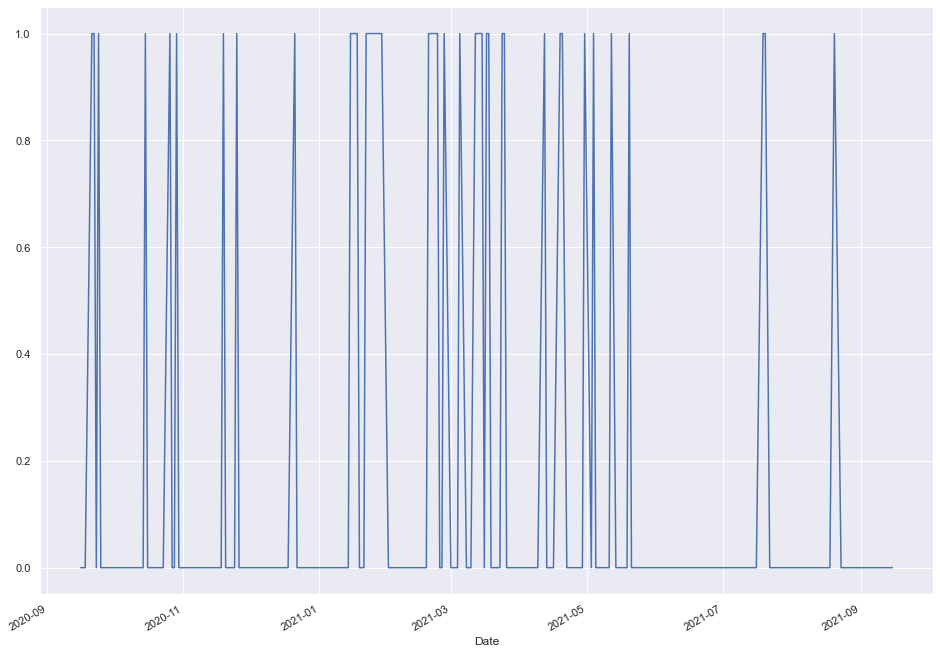

In [17]:
df.position.plot()

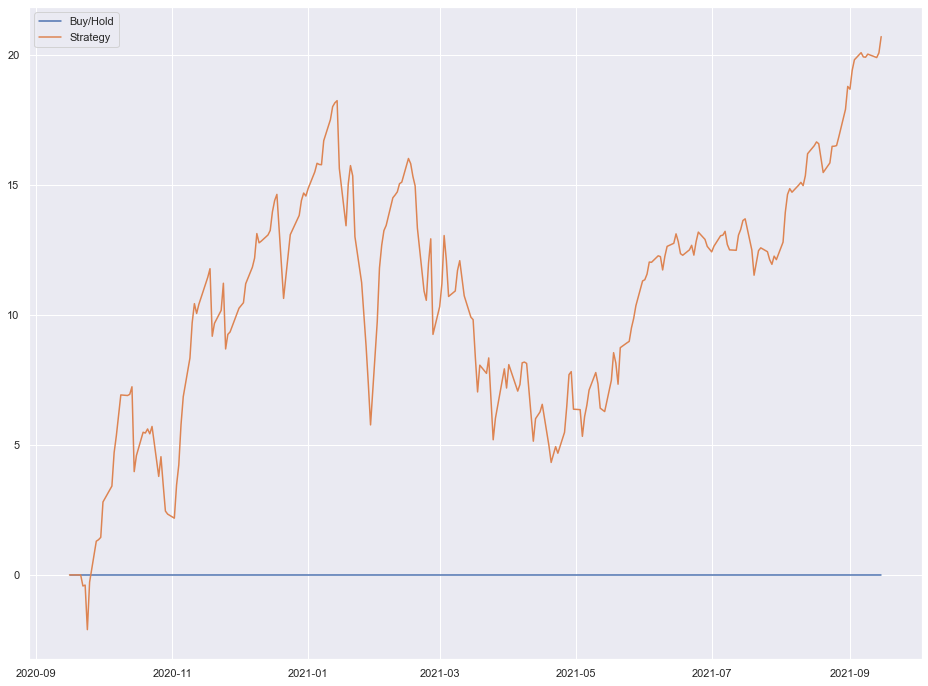

In [18]:
plt.plot(df['Buy/Hold-returns'], label='Buy/Hold')
plt.plot(df['vs_strat_returns'], label='Strategy')
plt.legend();

In [19]:
buyhold_retret=(Close[len(Close)-1]-Close[0]) / Close[0]
print("Buy/Hold return : ", buyhold_retret*100 , "%")


strat_retret= buyhold_retret + abs(buyhold_retret*df['vs_strat_returns'][-1]/100)
print("Strategy return : ", strat_retret*100 , "%")

Buy/Hold return :  52.78473519167567 %
Strategy return :  63.715343578128504 %


The Strategy outperforms the ETF by 11% in a span of 1 year.